  Importing the required libraries for analysis 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Reading the provided csv file with the help of pandas

In [2]:
df=pd.read_csv('Marketing_Sample_Dataset.csv')
print(df.shape)

(365, 15)


In [5]:
pd.pandas.set_option('display.max_columns',None)
df.head()

,index,campaign_name,ad_name,adset_name,spend,impressions,clicks,cpm,cpp,unique_ctr,ctr,unique_clicks,date_start,date_stop,publisher_platform
0,96,Campaign 4,Ad 5,Adset 6,6252.565316,39309,742,159.061928,179.095019,1.787351,1.887608,624,16-05-2021,16-05-2021,facebook
1,97,Campaign 4,Ad 5,Adset 6,5509.664684,98919,1005,55.698750,55.698750,0.953305,1.015983,943,16-05-2021,16-05-2021,instagram
2,98,Campaign 4,Ad 5,Adset 5,10924.877730,87666,1695,124.619325,137.771640,1.789475,1.933475,1419,16-05-2021,16-05-2021,facebook
3,99,Campaign 4,Ad 5,Adset 5,7890.802268,216464,1747,36.453185,37.013351,0.788506,0.807063,1681,16-05-2021,16-05-2021,instagram
4,100,Campaign 4,Ad 3,Adset 6,196.170000,1034,31,189.719536,233.535714,2.142857,2.998066,18,16-05-2021,16-05-2021,facebook


Checking if the dataset has NAN values

<AxesSubplot:>

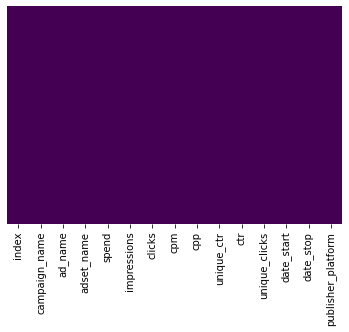

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We observe no NAN values in the above heatmap, hence we can go ahead with the further analysis 

We will be trying to divide the features into 3 types,numerical(continuous) features, categorical features and temporal features(data-time features)

We will be dropping the index column , since it is unique for every row and it won't be helping much with the analysis process

In [7]:
df=df.drop('index',axis=1)

Numerical Features

In [4]:
feature_num=[feature for feature in df.columns if df[feature].dtypes!='O']
print('The number of numerical features is :',len(feature_num))
df[feature_num].head()

The number of numerical features is : 9


,index,spend,impressions,clicks,cpm,cpp,unique_ctr,ctr,unique_clicks
0,96,6252.565316,39309,742,159.061928,179.095019,1.787351,1.887608,624
1,97,5509.664684,98919,1005,55.698750,55.698750,0.953305,1.015983,943
2,98,10924.877730,87666,1695,124.619325,137.771640,1.789475,1.933475,1419
3,99,7890.802268,216464,1747,36.453185,37.013351,0.788506,0.807063,1681
4,100,196.170000,1034,31,189.719536,233.535714,2.142857,2.998066,18


Temporal Features ( Features with date-time )

In [9]:
feature_date=[features for features in df.columns if 'date' in features]
print('The number of date feature is :',len(feature_date))
df[feature_date].head()

The number of date feature is : 2


,date_start,date_stop
0,16-05-2021,16-05-2021
1,16-05-2021,16-05-2021
2,16-05-2021,16-05-2021
3,16-05-2021,16-05-2021
4,16-05-2021,16-05-2021


Categorical Features

In [10]:
feature_cat=[feature for feature in df.columns if feature not in feature_date and feature not in feature_num]
print('The number of categorical features is :', len(feature_cat))
df[feature_cat].head()

The number of categorical features is : 4


,campaign_name,ad_name,adset_name,publisher_platform
0,Campaign 4,Ad 5,Adset 6,facebook
1,Campaign 4,Ad 5,Adset 6,instagram
2,Campaign 4,Ad 5,Adset 5,facebook
3,Campaign 4,Ad 5,Adset 5,instagram
4,Campaign 4,Ad 3,Adset 6,facebook


Analyzing expenditure on different campaigns using plot 

Text(0.5, 1.0, 'Campaign vs Expenditure')

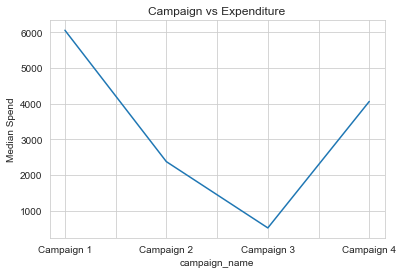

In [57]:
df.groupby('campaign_name')['spend'].median().plot()
plt.xlabel('campaign_name')
plt.ylabel('Median Spend')
plt.title('Campaign vs Expenditure')

In [ ]:
#We can clearly observe that expenditure is highest for the Campaign 4 and minimum for the Campaign 3 from the plot above.

In [ ]:
#Likewise we can check for the number of clicks that were observed under a single campaign 

Text(0.5, 1.0, 'Campaign vs Clicks')

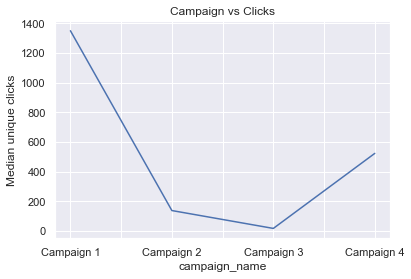

In [139]:
df.groupby('campaign_name')['unique_clicks'].median().plot()
plt.xlabel('campaign_name')
plt.ylabel('Median unique clicks')
plt.title('Campaign vs Clicks')

We observe that unique clicks during the campaign 1 is the highest and camapign 3 is the lowest, here we can also observe that the number of unique clicks vary in a smilar pattern to the expenditure on these campaigns.

Further we can check for any correlation between the numerical features

In [9]:
df[feature_num].corr().style.background_gradient(cmap='coolwarm')

,spend,impressions,clicks,cpm,cpp,unique_ctr,ctr,unique_clicks
spend,1.000000,0.778065,0.752928,-0.418070,-0.396772,-0.023944,0.043007,0.835966
impressions,0.778065,1.000000,0.658791,-0.611447,-0.601011,-0.160217,-0.078589,0.794901
clicks,0.752928,0.658791,1.000000,-0.352870,-0.339567,0.247629,0.352402,0.968318
cpm,-0.418070,-0.611447,-0.352870,1.000000,0.985287,0.455023,0.331263,-0.432681
cpp,-0.396772,-0.601011,-0.339567,0.985287,1.000000,0.481339,0.336164,-0.418858
unique_ctr,-0.023944,-0.160217,0.247629,0.455023,0.481339,1.000000,0.883411,0.183775
ctr,0.043007,-0.078589,0.352402,0.331263,0.336164,0.883411,1.000000,0.266662
unique_clicks,0.835966,0.794901,0.968318,-0.432681,-0.418858,0.183775,0.266662,1.000000


With the help of above correlation table we are able to observe that cpm is highly correlated to cpp, clicks is highly correlated to unique_clicks

We will be creating different dataframes on the basis of different categories, to get a better understanding of the data

<Figure size 7200x7200 with 0 Axes>

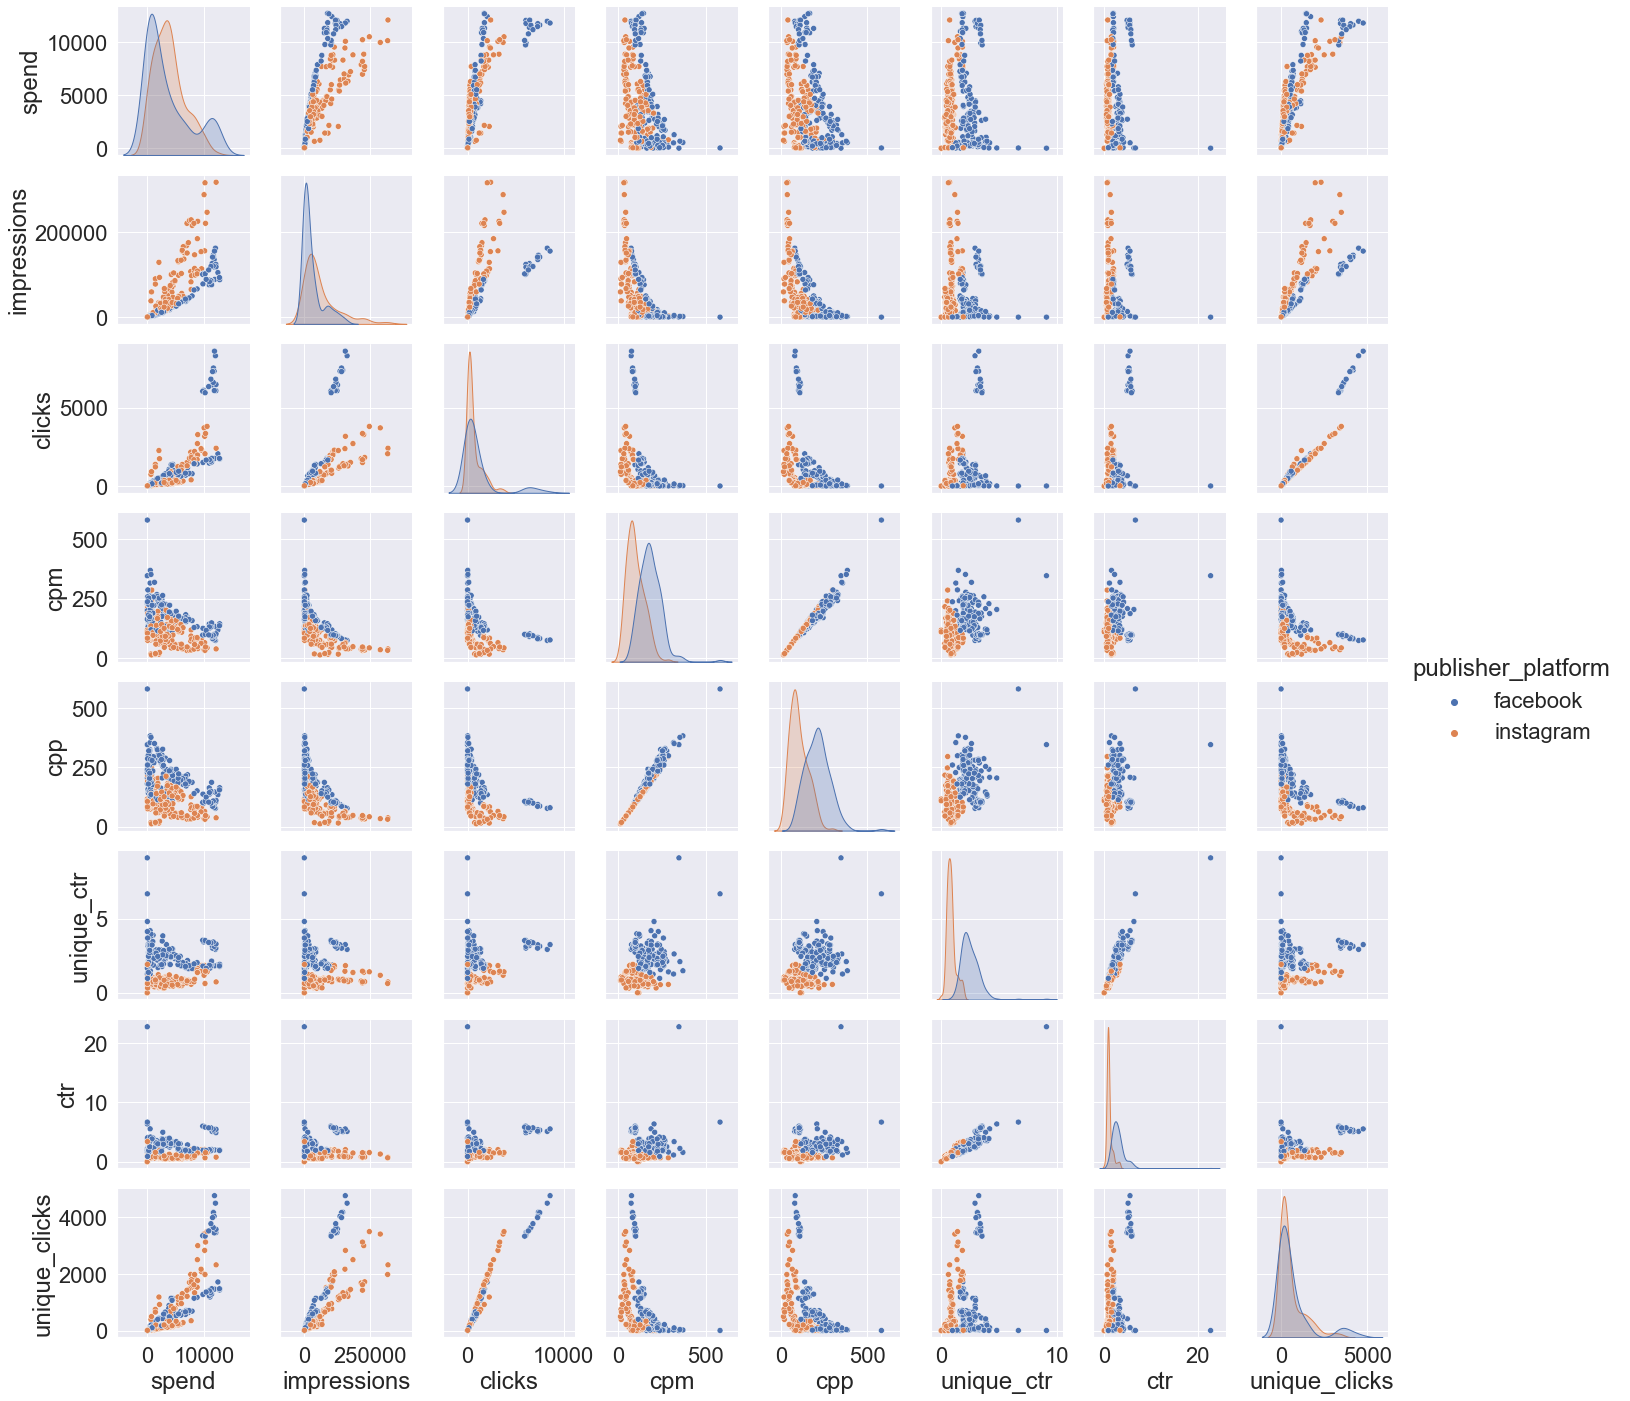

In [75]:
plt.figure(figsize=(100,100))
sns.set(font_scale=2)
ax=sns.pairplot(df,hue='publisher_platform')


With the help of the pair plot, comparision between various numerical paramters is jot down. But we cannot draw any concrete solution with the help of this plot, hence we will continue our analysis

Comparing the number of clicks as a function of date

It is observed that on 18 th May the ad campaigns got the maximum number of clicks and on 26th May the lowest

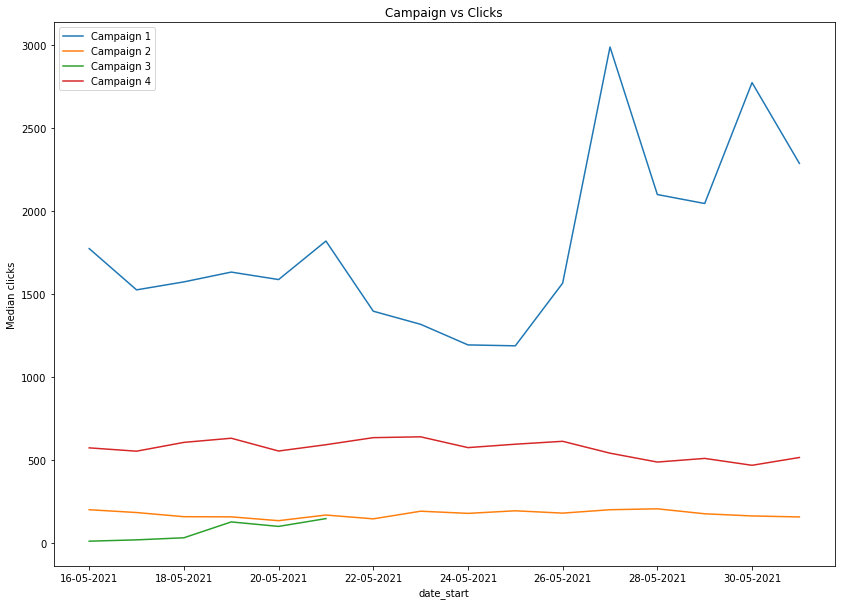

In [18]:
plt.figure(figsize=(14,10))
for c_name in ["Campaign 1","Campaign 2","Campaign 3","Campaign 4"]:
        df_temp=df[df['campaign_name']==c_name]
        df_temp.groupby('date_start')['clicks'].median().plot(label=c_name)
plt.xlabel('date_start')
plt.ylabel('Median clicks')
plt.title('Campaign vs Clicks')        
plt.legend(loc='upper left')        
plt.show()
    

From the above plot we are trying to segregate the number of clicks observed during different dates with respect to different campaigns, we can observe that campaign 1 has gathered majority of the clicks throughout.

 Checking for outlier data in numerical features

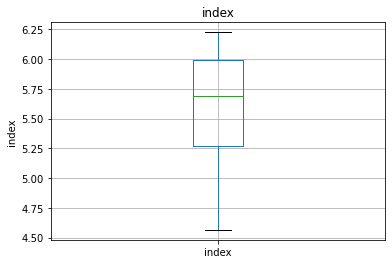

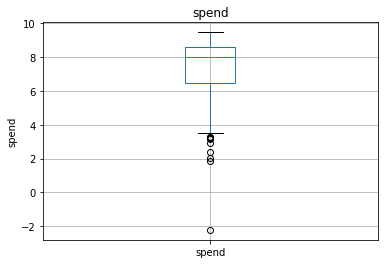

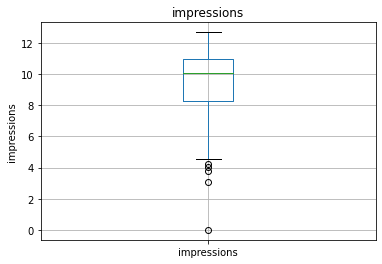

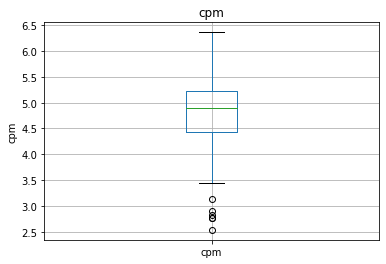

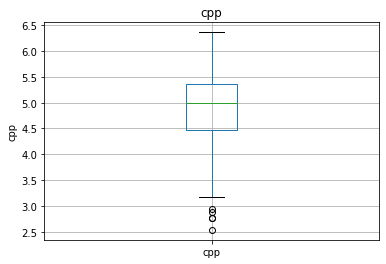

In [6]:
 for feature in feature_num:
        data=df.copy()
        if 0 in data[feature].unique():
            pass
        else:
            data[feature]=np.log(data[feature]) #Since the range of the numerical features have variable ranges,we take log to normalize
            data.boxplot(column=feature)
            plt.ylabel(feature)
            plt.title(feature)
            plt.show()
        

From the above box plots it is evident that our dataset contains outliers(marked by circles)

We will now try to seregate the number of impression campaign wise which could be gathered by a given adset under the campaign 

Text(0.5, 1.0, 'adset vs impression')

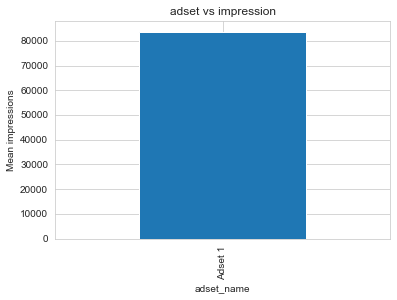

In [54]:
df_cam1.groupby('adset_name')['impressions'].mean().plot.bar()
plt.xlabel('adset_name')
plt.ylabel('Mean impressions')
plt.title('adset vs impression')

It is observed that there was only adset 1 under campaign 1 which could gather around 80K mean impressions

Text(0.5, 1.0, 'adset vs impression')

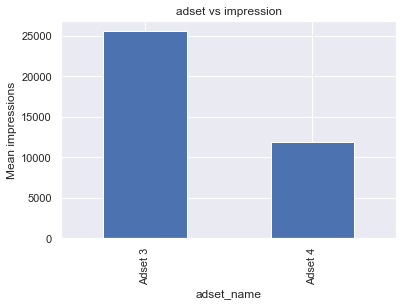

In [129]:


df_cam2.groupby('adset_name')['impressions'].mean().plot.bar()
plt.xlabel('adset_name')
plt.ylabel('Mean impressions')
plt.title('adset vs impression')

It is observed that there are two adsets under campign 2 namely (adset 3 and adset 4) out of which adset 3 could gather more impressions

Text(0.5, 1.0, 'adset vs impression')

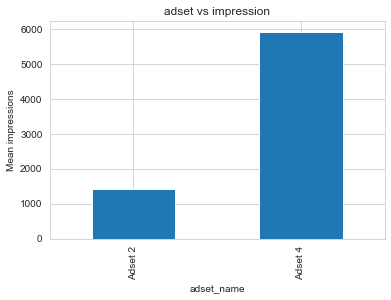

In [56]:
df_cam3.groupby('adset_name')['impressions'].mean().plot.bar()
plt.xlabel('adset_name')
plt.ylabel('Mean impressions')
plt.title('adset vs impression')

It is observed that there are two adsets under campign 3 namely (adset 2 and adset 4) out of which adset 4 could gather more impressions

Text(0.5, 1.0, 'adset vs impression')

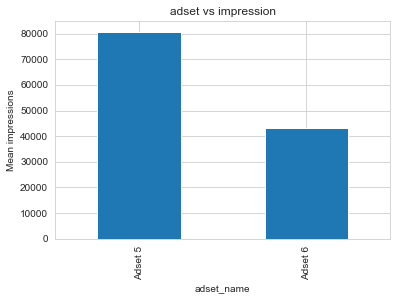

In [55]:
df_cam4.groupby('adset_name')['impressions'].mean().plot.bar()
plt.xlabel('adset_name')
plt.ylabel('Mean impressions')
plt.title('adset vs impression')

It is observed that there are two adsets under campign 4 namely (adset 5 and adset 6) out of which adset 5 could gather more impressions

Since we observed high correlation between some of features we can deduce our conclusions on the basis of fewer number of features (for example-since ctr is highly correlated to cpm, we can use any one of the parameter for our analysis)

Checking for cross platform data

In [91]:
cross_platforms=df.publisher_platform.unique()

In [92]:
cross_platforms

array(['facebook', 'instagram'], dtype=object)

Text(0.5, 1.0, 'platform vs impression')

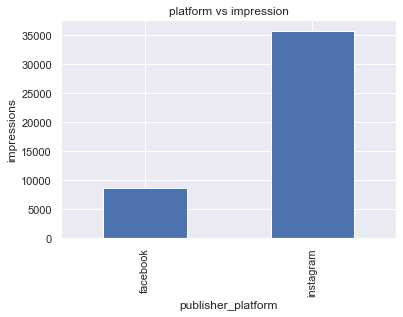

In [126]:
df.groupby('publisher_platform')['impressions'].median().plot.bar()
plt.xlabel('publisher_platform')
plt.ylabel('impressions')
plt.title('platform vs impression')

It is observed that the number of impressions on instagram is more as compared to facebook.

Text(0.5, 1.0, 'platform vs click through rate')

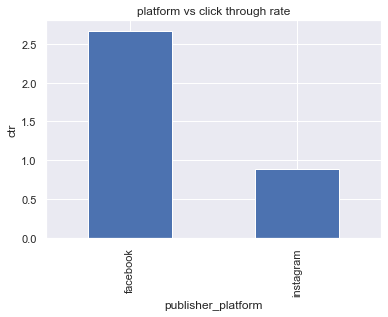

In [98]:
df.groupby('publisher_platform')['ctr'].median().plot.bar()
plt.xlabel('publisher_platform')
plt.ylabel('ctr')
plt.title('platform vs click through rate')

It can be drawn from the above plot that ctr is higher on facebook compared to instagram 

Comparing ctr values for different ads under adset under multiple campaigns

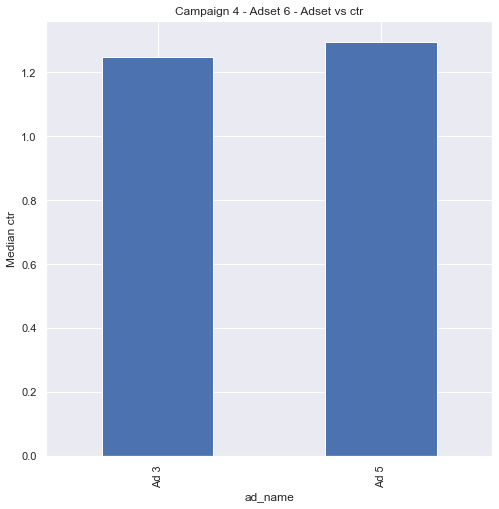

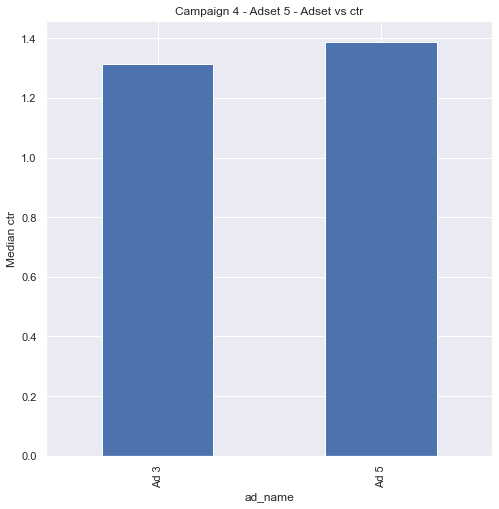

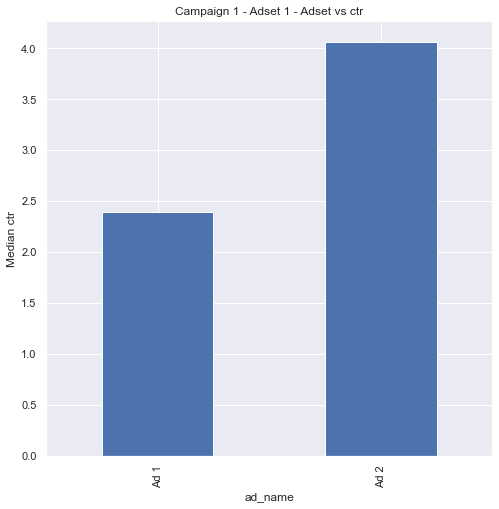

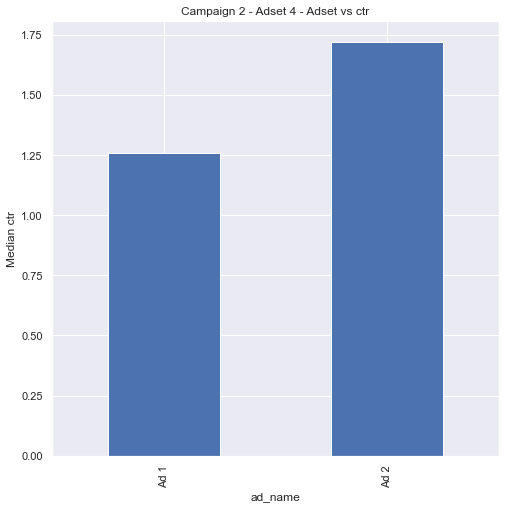

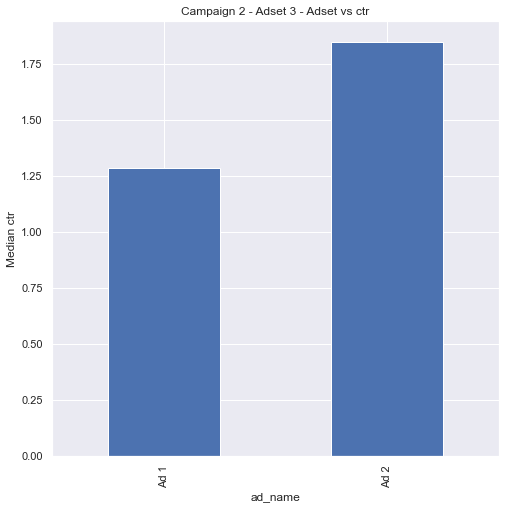

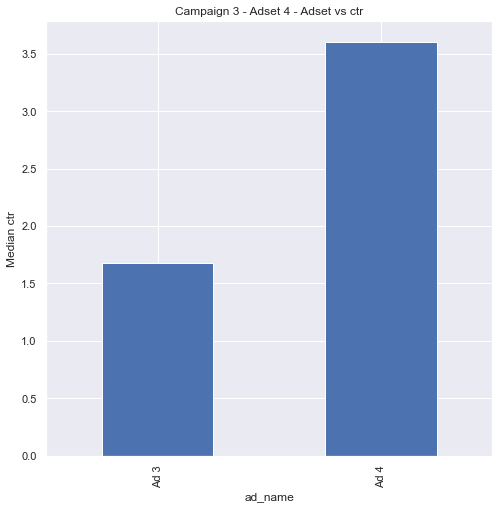

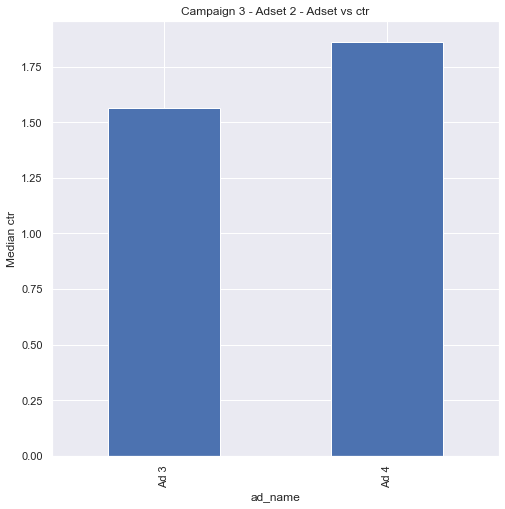

In [136]:
for campaign in df.campaign_name.unique():
    df_camp = df[df['campaign_name'] == campaign]
    
    for adset in df_camp.adset_name.unique():
        df_adset = df_camp[df_camp['adset_name'] == adset]
        plt.figure(figsize=(8,8))
        df_adset.groupby('ad_name')['ctr'].median().plot.bar()
        plt.xlabel('ad_name')
        plt.ylabel('Median ctr')
        plt.title(campaign + ' - '+ adset + ' - Adset vs ctr')
        plt.show()  


In digital marketing a ctr between 1.5-3 is considered to be an effective ad campaign, we can make our conclusions from the plotted bar chart accordingly ,for eg-( within the 4 campaigns organized campaign 3->adset 4->Ad 4 is said to be succesful

Exploring expenditure on ad in an adset under a campaign

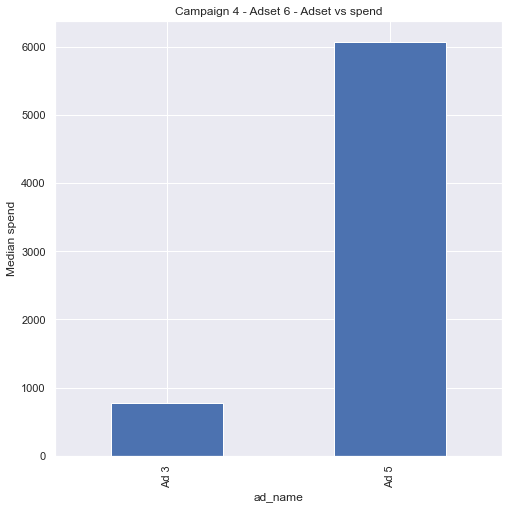

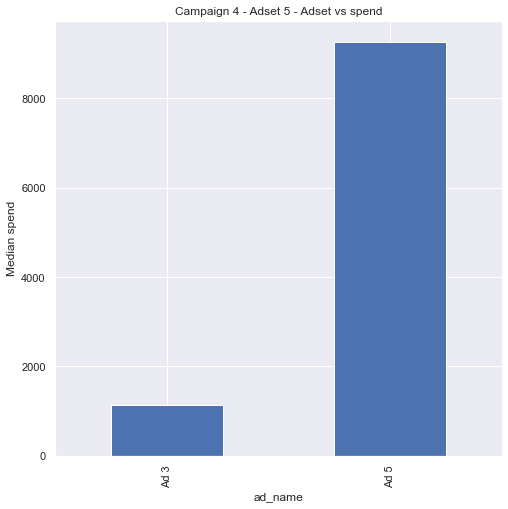

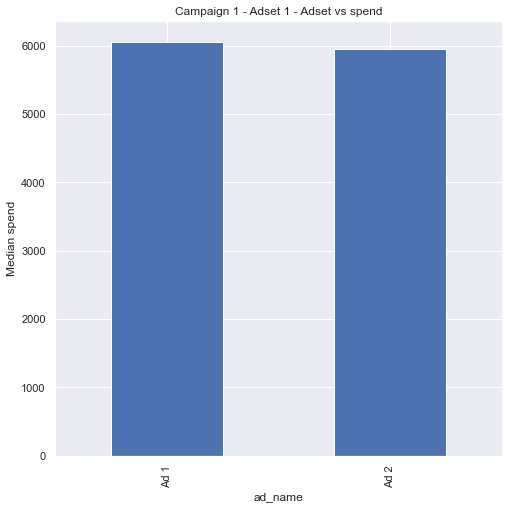

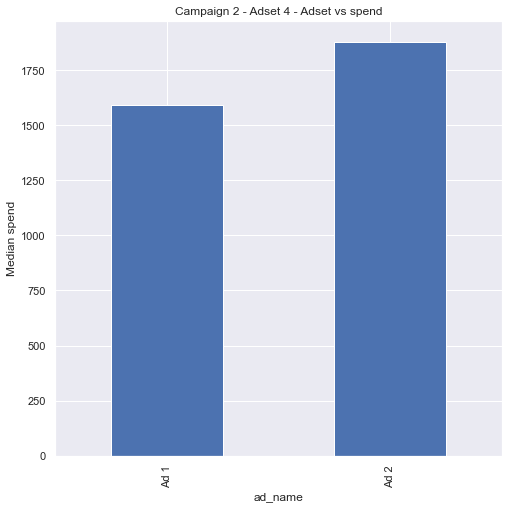

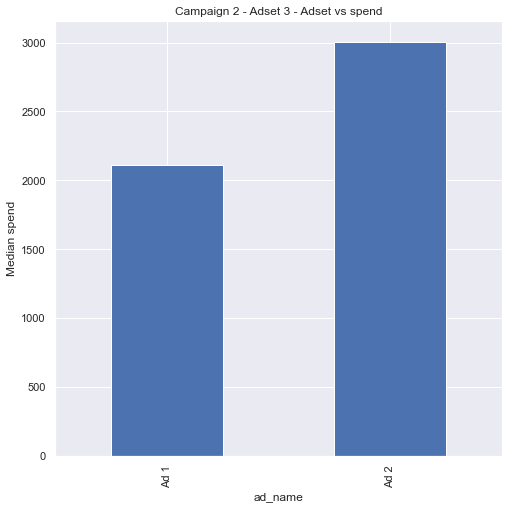

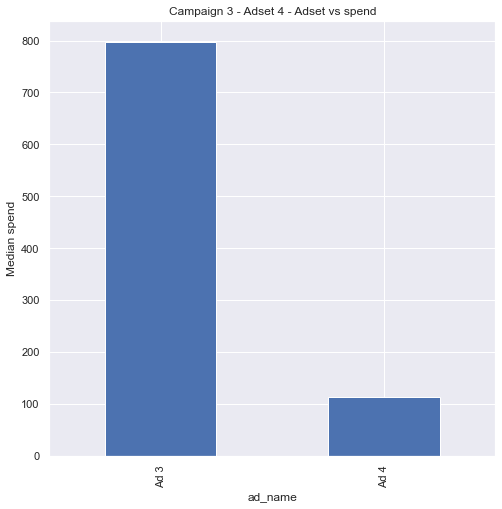

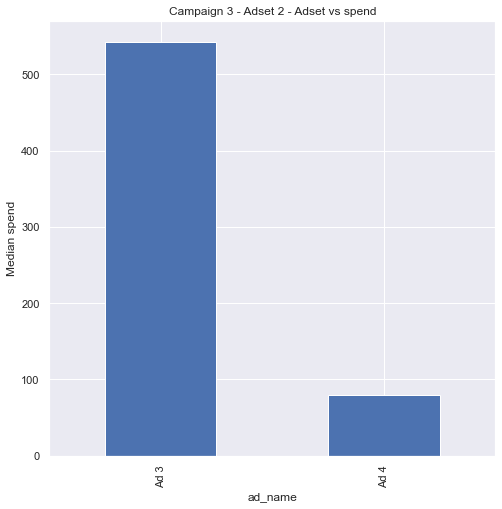

In [138]:
for campaign in df.campaign_name.unique():
    df_camp = df[df['campaign_name'] == campaign]
    
    for adset in df_camp.adset_name.unique():
        df_adset = df_camp[df_camp['adset_name'] == adset]
        plt.figure(figsize=(8,8))
        df_adset.groupby('ad_name')['spend'].median().plot.bar()
        plt.xlabel('ad_name')
        plt.ylabel('Median spend')
        plt.title(campaign + ' - '+ adset + ' - Adset vs spend')
        plt.show()  
